In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

folder = r'\\cmvm.datastore.ed.ac.uk\cmvm\sbms\groups\CDBS_SIDB_storage\Spires-JonesLab\Current Lab Members\Francesco\2p\2024 01 24-26 GCaMP\Analysis\Bleaching'

file_name='8s.csv'

df=pd.read_csv(os.path.join(folder, file_name))


In [433]:
df=df.loc[1:, :].reset_index(drop=True)
df=df.drop('Slice', axis=1)
df=df.astype(float)

In [434]:
df

,7.2-S25,7.2-S31,1.7-S04,7.21-S02,7.21-S07,7.21-S14,7.21-S18,7.21-S22
0,20.0000,20.0000,10.0000,10.0000,10.0000,10.0000,10.0000,10.0000
1,157.7351,76.5810,51.8338,58.1721,76.7143,92.5355,54.1936,42.5889
2,143.7013,71.2535,46.9607,52.3406,68.4286,86.9705,47.3633,38.6324
3,140.8493,59.9754,44.2568,50.8370,68.2024,82.8336,45.6347,36.6324
4,139.5870,64.3028,42.8097,48.8949,63.4226,82.0104,42.8782,35.6917
...,...,...,...,...,...,...,...,...
3596,93.0649,26.9789,NaN,NaN,NaN,NaN,NaN,NaN
3597,97.6182,29.9190,NaN,NaN,NaN,NaN,NaN,NaN
3598,93.6338,26.6585,NaN,NaN,NaN,NaN,NaN,NaN
3599,96.7117,28.0317,NaN,NaN,NaN,NaN,NaN,NaN


In [435]:
# this converts recordings at 20Hz into 10Hz

for column in df.columns:
    if df.loc[0, column]==20:
        for i in list(range(1,int(len(df.index)//2 - 1))):
            df.loc[i+1, column]= df.loc[(2*i+1), column]
            
df=df.loc[1:, :].reset_index(drop=True)
df= df.loc[0:599, :]
df=df.astype(float)

In [436]:
df

,7.2-S25,7.2-S31,1.7-S04,7.21-S02,7.21-S07,7.21-S14,7.21-S18,7.21-S22
0,157.7351,76.5810,51.8338,58.1721,76.7143,92.5355,54.1936,42.5889
1,140.8493,59.9754,46.9607,52.3406,68.4286,86.9705,47.3633,38.6324
2,139.8493,66.3908,44.2568,50.8370,68.2024,82.8336,45.6347,36.6324
3,139.2130,63.5915,42.8097,48.8949,63.4226,82.0104,42.8782,35.6917
4,132.3299,60.4331,43.2054,48.5199,61.2500,76.2253,43.9381,34.3755
...,...,...,...,...,...,...,...,...
595,100.7143,35.8415,32.6314,35.4004,39.2500,50.8562,28.5509,24.3004
596,101.2312,38.6549,33.9547,34.5616,36.8056,52.2756,27.5968,25.3597
597,107.9403,37.9824,33.0906,34.5670,38.3452,52.2392,27.5729,24.4229
598,108.3273,37.3873,34.0060,35.1667,38.8889,50.9705,29.0080,25.7273


In [437]:
def normalise(df):
    for column in df.columns:
        df[column]=(df[column])/df.loc[0, column]
    return df

In [438]:
df=normalise(df)

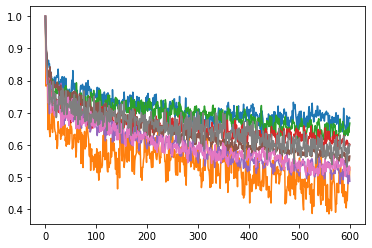

In [439]:
for column in df.columns:
    plt.plot(df[column])

In [440]:
df['Avg']=df.iloc[:,:].mean(axis=1)
df['Std']=df.iloc[:,:].std(axis=1)
df['Time (s)']=df.index*0.1

R² = 0.9771543656780828
Y = 0.23147872039023568 * e^(-2.6517543570302284 * x) + 0.2092560592149629 * e^(-0.026189451576775945 * x) + 0.5312270575191366


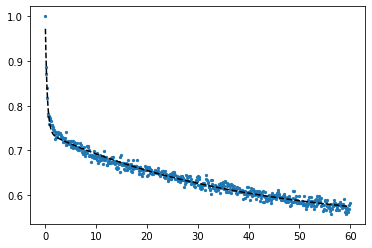

In [441]:
import scipy 
import scipy.optimize

def biExp(x, m0, t0, m1, t1, b):
    return m0 * np.exp(-t0 * x) + m1 * np.exp(-t1 * x) + b

p0 = (.5, 1, .5, .01, 1) # start with values near those we expect

x=df['Time (s)']
y=df['Avg']
error = df['Std']

params, cv = scipy.optimize.curve_fit(biExp, x, y, p0)

m0, t0, m1, t1, b = params

# determine quality of the fit
squaredDiffs = np.square(y - biExp(x, m0, t0, m1, t1, b))
squaredDiffsFromMean = np.square(y - np.mean(y))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.scatter(x, y, s=5,  label = 'data')
plt.plot(x, biExp(x, m0, t0, m1, t1, b), '--', c = 'k', label="fitted")

print(f"Y = {m0} * e^(-{t0} * x) + {m1} * e^(-{t1} * x) + {b}")

In [442]:
def tr(x):
    y = '%.5f'%x
    return y

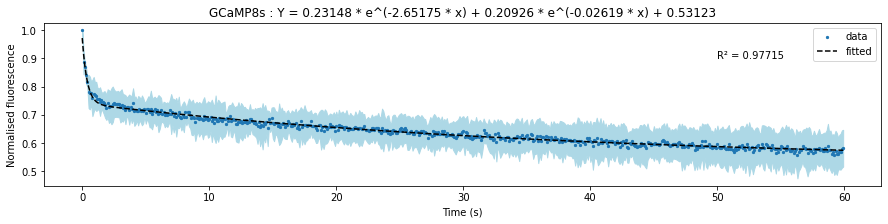

In [443]:
equation = f"Y = {tr(m0)} * e^(-{tr(t0)} * x) + {tr(m1)} * e^(-{tr(t1)} * x) + {tr(b)}"

fig=plt.figure(figsize=(15,3))
plt.fill_between(x, y-error, y+error, color='lightblue')
plt.scatter(x, y, s=5,  label = 'data')
plt.plot(x, biExp(x, m0, t0, m1, t1, b), '--', c = 'k', label="fitted")
plt.legend(loc='best')
plt.ylabel('Normalised fluorescence')
plt.xlabel('Time (s)')
plt.title('GCaMP' +file_name[:-4]+' : ' + str(equation))
plt.text(50,0.9,f"R² = {tr(rSquared)}")
plt.show()